<a href="https://colab.research.google.com/github/bingjun5249/bootcamp/blob/main/Zbosonreconstruction01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install uproot3

     |████████████████████████████████| 122kB 8.7MB/s 
     |████████████████████████████████| 92kB 6.0MB/s 


In [ ]:
import uproot3 as ROOT
import uproot3_methods as ROOT_methods
import numpy as np
import awkward0 as ak
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import font_manager
#import mplhep as hep
import sys

In [ ]:
!ls drive/MyDrive/unweighted_events2.root

ls: cannot access 'drive/MyDrive/unweighted_events2.root': No such file or directory


In [ ]:
tree = ROOT.open("drive/MyDrive/rootfiles/p p > l+ l-/unweighted_events1.root")["LHEF"]

In [ ]:
pt = tree["Particle.PT"].array()
pid = tree["Particle.PID"].array()
status = tree["Particle.Status"].array()

In [ ]:
print(pt)
print(pid)
print(status)

[[0.0 0.0 0.0 36.341984371534785 36.341984371534785] [0.0 0.0 14.690639377406585 14.690639377406585] [0.0 0.0 0.0 30.80004362191049 30.80004362191049] ... [0.0 0.0 11.066012584757207 11.066012584757207] [0.0 0.0 0.0 27.242084690087296 27.242084690087296] [0.0 0.0 0.0 36.66356318762686 36.66356318762686]]
[[-2 2 23 -11 11] [-2 2 -11 11] [2 -2 23 -11 11] ... [-2 2 -13 13] [1 -1 23 -13 13] [-1 1 23 -11 11]]
[[-1 -1 2 1 1] [-1 -1 1 1] [-1 -1 2 1 1] ... [-1 -1 1 1] [-1 -1 2 1 1] [-1 -1 2 1 1]]


In [ ]:
# mask : 조건식

e_mask = ((pid == 11) & (status == 1)) | ((pid == -11) & (status == 1))
u_mask = ((pid == 13) & (status == 1)) | ((pid == -13) & (status == 1))

In [ ]:
print(e_mask)
print(u_mask)

[[False False False True True] [False False True True] [False False False True True] ... [False False False False] [False False False False False] [False False False True True]]
[[False False False False False] [False False False False] [False False False False False] ... [False False True True] [False False False True True] [False False False False False]]


In [ ]:
elec_pt = pt[e_mask].flatten()
muon_pt = pt[u_mask].flatten()

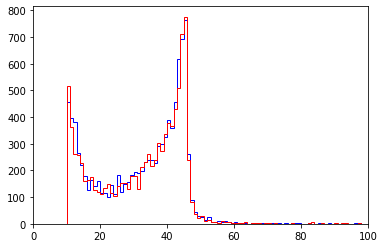

In [ ]:
plt.hist(elec_pt,bins=300,range=(0,300),color='blue',histtype='step')
plt.hist(muon_pt,bins=300,range=(0,300),color='red',histtype='step')
plt.xlim(0,100)
plt.show()

In [ ]:
phi = tree["Particle.Phi"].array()

In [ ]:
elec_phi = phi[e_mask].flatten()
muon_phi = phi[u_mask].flatten()

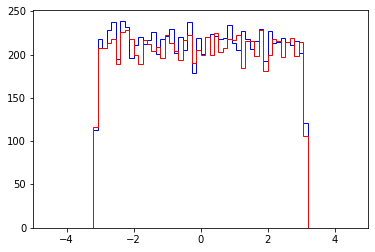

In [ ]:
plt.hist(elec_phi,bins=300,range=(-20,20),color='blue',histtype='step')
plt.hist(muon_phi,bins=300,range=(-20,20),color='red',histtype='step')
plt.xlim(-5,5)
plt.show()

In [ ]:
mass = tree["Particle.M"].array()

In [ ]:
a_mask = (pid == 22)
z_mask = (pid == 23)

In [ ]:
print(a_mask)
print(z_mask)

[[False False False False False] [False False False False] [False False False False False] ... [False False False False] [False False False False False] [False False False False False]]
[[False False True False False] [False False False False] [False False True False False] ... [False False False False] [False False True False False] [False False True False False]]


In [ ]:
photon_m = mass[a_mask].flatten()
zboson_m = mass[z_mask].flatten()

In [ ]:
for i in range(len(a_mask)):
  print(photon_m[i])

IndexError: ignored

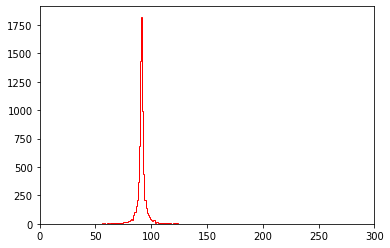

In [ ]:
plt.hist(zboson_m,bins=300,range=(0,300),color='red',histtype='step')
plt.hist(photon_m,bins=300,range=(0,300),color='blue',histtype='step')
plt.xlim(0,300)
plt.show()

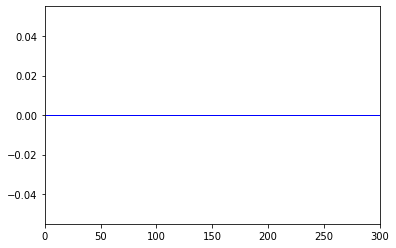

In [ ]:
plt.hist(photon_m,bins=300,range=(0,300),color='blue',histtype='step')
plt.xlim(0,300)
plt.show()